Os dados usados nesse projeto referem-se a uma base de dados cinematográfica, que conta com dados sobre os filmes e as avalizações dos usuários.

#### 🖤 Módulo 1: Visualização de Dados com Histograma e Boxplot

In [1]:
# importando as bibliotecas
import matplotlib
import matplotlib.pyplot as plt
import mplcyberpunk
import pandas as pd
import seaborn as sns

In [2]:
# visualizando os dados das ratings dos filmes
ratings = pd.read_csv("src/movie_lens/ratings.csv")
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
# visualizando estatísticas sobre esses dados
ratings.rating.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [4]:
# definindo configurações de estilo iniciais:
plt.style.use("seaborn-dark")
for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#1B1C25'  # bluish dark grey

for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '#E0DEDE'  # very light grey

<AxesSubplot:ylabel='Frequency'>

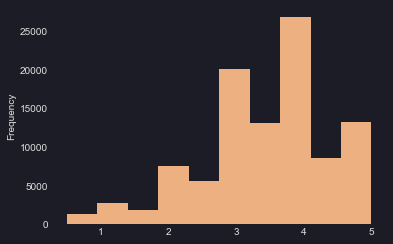

In [5]:
# plotando um histograma com os dados de ratings

ratings.rating.plot(kind='hist', cmap='flare')

c:\Users\lsantana\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rating'>

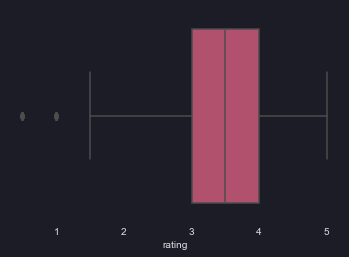

In [6]:
# plotando um boxplot
sns.boxplot(ratings.rating, palette='flare')

#### 🖤️ Módulo 2: Análise Exploratória dos Dados

In [7]:
# visualizando os dados dos filmes
movies = pd.read_csv("src/movie_lens/movies.csv")
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
# exibindo a nota média dos três primeiros filmes
for i in range(1,4):
    movie_rating = round(ratings.query(f"movieId=={i}").rating.mean(), 2)
    movie_title = movies.query(f"movieId=={i}").title
    print(f'🎬 Movie: {movie_title[i-1]} | Average Rating: {movie_rating} ⭐')

🎬 Movie: Toy Story (1995) | Average Rating: 3.92 ⭐
🎬 Movie: Jumanji (1995) | Average Rating: 3.43 ⭐
🎬 Movie: Grumpier Old Men (1995) | Average Rating: 3.26 ⭐


In [9]:
# agrupando todas as notas de cada filme
mean_ratings = ratings.groupby("movieId").mean()['rating']
mean_ratings

movieId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: rating, Length: 9724, dtype: float64

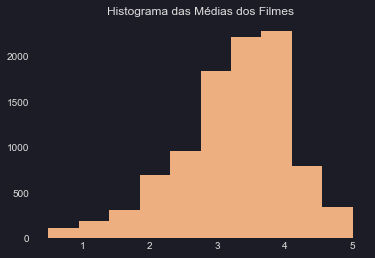

In [10]:
# plotando gráficos para visualizar os dados de média por filmes
cmap = matplotlib.cm.get_cmap('flare')
rgba = cmap(1)

plt.hist(mean_ratings, color=rgba)
plt.title('Histograma das Médias dos Filmes')
plt.show()

#### 🖤️ Módulo 3: Explorando variáveis 

In [11]:
# carregando os dados do tmdb
tmbd = pd.read_csv("src/tmdb/tmdb_5000_movies.csv")
tmbd.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [12]:
# vendo todas as línguas existentes na coluna "language"
tmbd.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

💜 Sobre Variáveis: 
* As variáveis categóricas são aquelas que não possuem valores quantitativos, mas, ao contrário, são definidas por várias categorias, ou seja, representam uma classificação dos indivíduos. Podem ser nominais ou ordinais.
* Quando estamos trabalhando com categorias ordinais, existe uma ordenação entre as categorias. Por exemplo: escolaridade (primeiro, segundo e terceiro graus), estágios de uma doença (inicial, intermediário, terminal), mês de observação (janeiro, fevereiro, ..., dezembro), etc.

#### 🖤 Módulo 4: Visualização de Dados 

In [13]:
# contando quantos filmes de cada língua
language_count = tmbd.original_language.value_counts().to_frame().reset_index()
language_count.columns = ["original_language", "count"] 
language_count.head()
# tmbd["original_language"].value_counts() retornaria o mesmo resultado e é uma melhor prática!

,original_language,count
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


<AxesSubplot:xlabel='original_language', ylabel='count'>

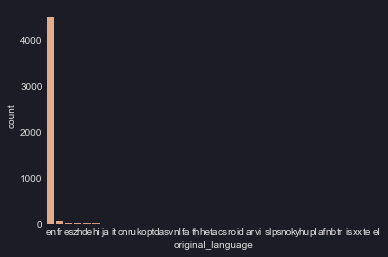

In [14]:
sns.barplot(x="original_language", y="count", data=language_count, palette='flare')

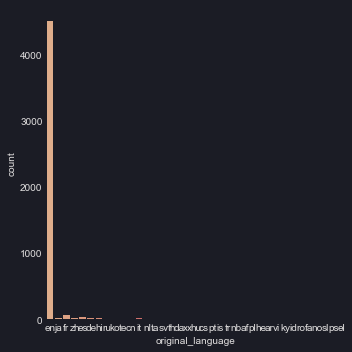

In [15]:
# maneira mais fácil de chegar ao resultado acima: 
sns.catplot(x="original_language", kind="count", data=tmbd, palette='flare')

A visualização acima fica muito complicada para uma análise, portanto, abaixo serão realizadas outros testes para criar gráficos melhores, de onde seja possível retirar conclusões de uma forma melhor!

In [16]:
total_per_language = tmbd["original_language"].value_counts()
total_eng = total_per_language.loc['en']
total = total_per_language.sum()
total_other_languages = total - total_eng
print(f"🖤 All the Movies: {total}\n    🎥 Movies in English = {total_eng}\n    🎥 Movies in Other Languages: {total_other_languages}")

🖤 All the Movies: 4803
    🎥 Movies in English = 4505
    🎥 Movies in Other Languages: 298


In [17]:
counts = {
    'language' : ['english','others'],
    'total' : [total_eng,total_other_languages]
}

counts = pd.DataFrame(counts)
counts

,language,total
0,english,4505
1,others,298


<AxesSubplot:xlabel='language', ylabel='total'>

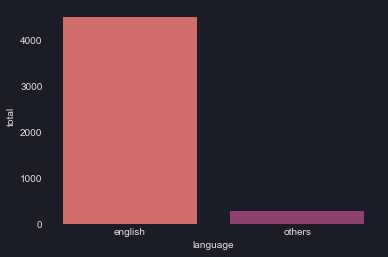

In [18]:
sns.barplot(x='language', y='total', data=counts, palette='flare')

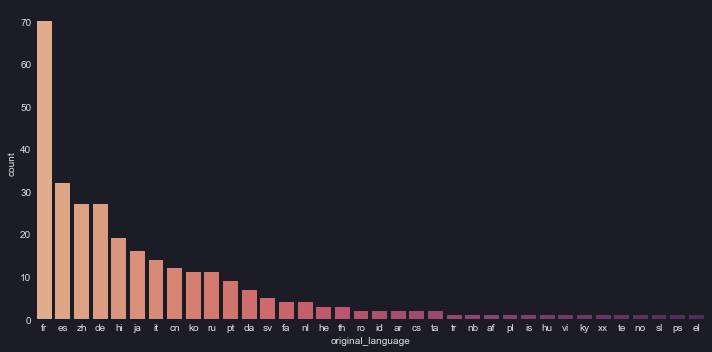

In [19]:
languages_without_english = tmbd.query("original_language != 'en'")
languages_without_english_count = tmbd.query("original_language != 'en'").original_language.value_counts()
sns.catplot(x='original_language', kind='count', data=languages_without_english, aspect=2, order= languages_without_english_count.index, palette='flare')

#### 🖤️ Módulo 5: Dados e Estatística

In [58]:
# escolhendo dois filmes específicos
movie1 = movies.query("title=='Scarface (1983)'")
movie2 = movies.query("title=='Fight Club (1999)'")
mv = [movie1, movie2]

ids = []
for item in mv:
    m = item.movieId
    ids.append(m.values[0])

ratings2 = []
for item in ids:
    r = ratings.query(f'movieId=={item}')
    ratings2.append(r)

In [59]:
i = 0
while i <= 1:
    print(f"🎥 A nota média de {mv[i].title.values[0]} é {round(ratings2[i].rating.mean(), 2)} ⭐")
    i += 1

🎥 A nota média de Scarface (1983) é 3.93 ⭐
🎥 A nota média de Fight Club (1999) é 4.27 ⭐


💡 média/mediana não é a melhor forma para analisar toda uma dispersão de dados! isso porque esses métodos resumem todos os dados em um único número, tornando certas análises impossíveis de ser feitas. o boxplot abaixo mostra informações sobre as notas que um número de média ou mediana por exemplo não mostrariam:

<AxesSubplot:xlabel='movieId', ylabel='rating'>

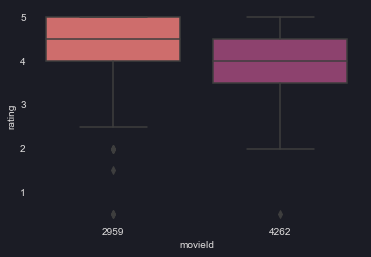

In [56]:
sns.boxplot(x = 'movieId', y = 'rating', data = ratings.query(f"movieId in {ids}"), palette='flare')

💡 **desvio padrão**: maneira de enxergar o quanto os dados dispersam de uma tendência central

In [60]:
i = 0
while i <= 1:
    print(f"🎥 O desvio padrão de {mv[i].title.values[0]} é {round(ratings2[i].rating.std(), 2)} ⭐")
    i += 1

# os desvios padrões desses filmes são bem parecidos, ou seja, as notas dadas a esses filmes não são tão divergentes assim entre si.

🎥 O desvio padrão de Scarface (1983) é 0.87 ⭐
🎥 O desvio padrão de Fight Club (1999) é 0.86 ⭐
